# Определение перспективного тарифа для телеком компании
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


Описание тарифов


  **Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика


Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей 


 **Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика


Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

**Описание данных**

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

***Ход выполнения работы***
- Шаг 1:
  - открыть таблицы
  - импортировать библиотеки
  - ознокомиться с данными
- Шаг 2 Предобработка и подготовка данных:
  - поиск пропусков, дубликатов, ошибок
  - замена типов данных
  - объеденение таблиц, поиск выручки 
- Шаг 3 Анализ данных:
  - исследовательский анализ данных
  - статистический анализ данных
- Шаг 4 Проверка гипотез
- Шаг 6 Общий вывод
  

# Шаг 1. Общая информация
## Открытие данных

### Импорт библеотек и модулей

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import re
import math
from IPython.display import display



### Открытие таблиц

In [2]:
calls = pd.read_csv('/datasets/calls.csv') # таблица со звонками
internet = pd.read_csv('/datasets/internet.csv') 
internet = internet.loc[:,'id':'user_id'] # таблица с интернет ссесиями
messages = pd.read_csv('/datasets/messages.csv') #  таблица с сообщениями
tariffs = pd.read_csv('/datasets/tariffs.csv') # таблица с информацией о тарифных планах
users = pd.read_csv('/datasets/users.csv') # информация о пользователях

### Просмотр общей информации

In [3]:
def info(data): # функция на просмотр общей информации к каждому датасету
    display(data.head(10))
    print(data.info())
    print(data.describe())
    
for data in [calls, internet, messages, tariffs, users]:
    info(data)
    

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None
             mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.50

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


## Вывод 
Качественная информация, пропуски есть только в таблице с информацией о пользователях(дата прекращения пользования тарифом), пропуски связаны с тем что, на момент выгрузки тариф еще используется. Во фреймах, где используется дата, тип даты представлен форматом "объект", нужно заменить на формат "дататайм", также нужно количество минут и количество мегабайт окгруглить в общуюю сторону, это связанно с условиями тарифа. В количестве минут и количестве мегабайт есть нулевые значения, далее посмотрим, что можно с этим сделать

# Шаг 2. Предобработка данных

### Замена типов данных/ поиск дубликатов
В каждой таблице, где используется дата тип данных представлен "object", нужно заменить на "datatime". 
Также, по условиям тарифов нужно округлить звонки и количество мегабайт в большую сторону.


In [4]:
# замена формата
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d') 
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
# округление в большую сторону, и смена формата на целочисленный 
calls['duration'] = np.ceil(calls['duration']).astype(int)
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int)


In [5]:
# поиск дубликатов
def duplicated(data):
    print('Количество дубликатов в Таблице ', data.duplicated().sum())
for data in [calls, internet, messages, users]:
    duplicated(data)
    

Количество дубликатов в Таблице  0
Количество дубликатов в Таблице  0
Количество дубликатов в Таблице  0
Количество дубликатов в Таблице  0


In [6]:
# найдем процент нулевых звонков и интернет сессий 
print('Количество звонков с продолжительностью 0 минут: ', calls.query('duration == 0.0').shape[0])
print('Количество мегабайт за сессию равная 0 мегабайт: ', internet.query('mb_used == 0').shape[0])
print('Процент нулевых звонков от общего количества: {:.1%}'.format(calls.query('duration == 0.0').shape[0] / calls.shape[0]))
print('Процент нулевых мегабайт от общего количества: {:.1%}'.format(internet.query('mb_used == 0').shape[0] / internet.shape[0]))

Количество звонков с продолжительностью 0 минут:  39613
Количество мегабайт за сессию равная 0 мегабайт:  19598
Процент нулевых звонков от общего количества: 19.6%
Процент нулевых мегабайт от общего количества: 13.1%


Процент достаточно большой, выдвину предположение, что если есть дата ссесии и звонка, то звонок и сессия была, а по условиям тарифа, округление идет в большую сторону, логично присвоить нулю еденицу

### Создание общей таблицы с иследуемыми значениями

In [7]:
# добавляем в таблицы столбцы с месяцами, нужно для анализа
calls['month'] = calls['call_date'].dt.month 
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

In [8]:
# присваиваем значению 0, значение 1 
calls.loc[calls['duration'] == 0, 'duration'] = 1
internet.loc[internet['mb_used'] == 0, 'mb_used'] = 1


In [9]:
# создаем таблицу с информацией о звонках каждого пользователя по месяцам
calls_in_month = calls.pivot_table(
    index = ['user_id', 'month'],
    values = 'duration',
    aggfunc = ['sum', 'count'])
calls_in_month = pd.DataFrame(calls_in_month.to_records())
calls_in_month.columns = ['user_id', 'month', 'duration', 'count_calls']


In [10]:
# создаем таблицу с информацией о количестве сообщений каждого пользователя по месяцам
messages_in_month = messages.pivot_table(
    index = ['user_id', 'month'],
    values = 'id',
    aggfunc = ['count'])
messages_in_month = pd.DataFrame(messages_in_month.to_records())
messages_in_month.columns = ['user_id', 'month', 'count_messages']

In [11]:
# создаем таблицу с информацией о количестве использованных мегабайт каждого пользователя по месяцам
mb_in_month = internet.pivot_table(
    index = ['user_id', 'month'],
    values = 'mb_used',
    aggfunc = ['sum'])
mb_in_month = pd.DataFrame(mb_in_month.to_records())
mb_in_month.columns = ['user_id', 'month', 'mb_used']


In [12]:
# создаем общую сводную таблицу с данными
df = calls_in_month.merge(messages_in_month, on=['user_id', 'month'], how='outer').merge(mb_in_month, on=['user_id', 'month'], how='outer')

In [13]:
# ищем пропуски
df.isna().sum()

user_id             0
month               0
duration           40
count_calls        40
count_messages    497
mb_used            11
dtype: int64

После слияния таблиц появились пропуски, это нормально т.к. пользователь мог пользоваться интернетом и не звонить и не посылать сообщения, или наоборот

In [14]:
# замена пропусков на 0, и возвращаем целочисленный формат, тк откуда-то появился флоат64
df = df.fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null int64
duration          3214 non-null int64
count_calls       3214 non-null int64
count_messages    3214 non-null int64
mb_used           3214 non-null int64
dtypes: int64(6)
memory usage: 175.8 KB


In [15]:
print(f"Кол-во клиентов: {df.user_id.nunique()}")

Кол-во клиентов: 498


In [16]:
# для дальнейшего слияния таблиц меняем название столбца в таблице с информацией о тарифах
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})

In [17]:
# добавляем в общую таблицу Город, тариф, информацию о тарифе 
user_tariff = users.loc[:, ['user_id', 'city', 'tariff']] # берем из таблицы только нужные для исследования данные
df = df.merge(user_tariff, on='user_id', how='left').merge(tariffs, on='tariff', how='left') 
df

,user_id,month,duration,count_calls,count_messages,mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,164,22,22,2257,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,187,43,60,23262,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,346,47,75,14017,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,418,52,81,14072,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,478,58,57,14583,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17246,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3210,1489,10,0,0,21,19599,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3211,1489,11,0,0,20,17526,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,12,0,0,35,17349,Санкт-Петербург,smart,50,15360,500,550,200,3,3


In [18]:
#напишем функцию по нахождению выручки 
def finde_revenue(row):
        over_duration = row['duration'] - row['minutes_included']
        over_messages = row['count_messages'] - row['messages_included']
        over_mb = row['mb_used'] - row['mb_per_month_included']
        if over_duration < 0:
            over_duration = 0
        if over_messages < 0:
            over_messages = 0
        if over_mb < 0:
            over_mb = 0
        return (row['rub_per_message']*over_messages)+(row['rub_per_minute']*over_duration)+((row['rub_per_gb'] / 1024)*over_mb) + (row['rub_monthly_fee'])
    
# добавим в общую таблицу столбец с выручкой
df['revenue'] = df.apply(finde_revenue, axis=1) 
    

df.head(15)

,user_id,month,duration,count_calls,count_messages,mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5,164,22,22,2257,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
1,1000,6,187,43,60,23262,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
2,1000,7,346,47,75,14017,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
3,1000,8,418,52,81,14072,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
4,1000,9,478,58,57,14583,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
5,1000,10,363,57,73,14717,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
6,1000,11,344,43,58,14769,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
7,1000,12,341,46,70,9829,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
8,1001,11,444,59,0,18460,Москва,smart,50,15360,500,550,200,3,3,1155.468750
9,1001,12,430,63,0,14059,Москва,smart,50,15360,500,550,200,3,3,550.000000


In [19]:
df['revenue'].describe()

count    3214.000000
mean     1499.400955
std       787.006116
min       550.000000
25%       713.830078
50%      1591.011719
75%      1950.000000
max      6768.335938
Name: revenue, dtype: float64

## Вывод
Создали общую таблицу с интересующими нас значениями, в данных убрали возникшие пропуски, добавили в таблицу информацию с выручкой, заменили тип данных

# Шаг 3 Анализ данных

In [20]:
smart_df = df.query('tariff == "smart"') # таблица с тарифом смарт
ultra_df = df.query('tariff == "ultra"') # таблица с тарифом ультра

In [21]:
# таблица со средней информацией по месяцам тарифа смарт и сверх заработок
smart_by_month = smart_df.pivot_table(
    index = 'month',
    values = ['duration', 'count_messages', 'mb_used', 'revenue'],
    aggfunc = 'mean')
smart_by_month['delta'] = smart_by_month['revenue'] - 550 # стобец со сверхвыручкой
smart_by_month

,count_messages,duration,mb_used,revenue,delta
month,,,,,
1,18.235294,209.647059,8528.588235,704.895910,154.895910
2,24.086207,306.310345,11617.344828,812.159752,262.159752
3,31.857143,400.532468,15131.207792,1133.213271,583.213271
4,30.741071,377.000000,13486.080357,934.781878,384.781878
5,33.773050,398.404255,15832.751773,1161.004377,611.004377
6,33.402439,406.701220,15822.445122,1164.601038,614.601038
7,33.751244,419.288557,15771.398010,1185.629392,635.629392
8,33.638298,433.191489,16640.212766,1276.647008,726.647008
9,33.638462,440.080769,16332.615385,1217.753456,667.753456


In [22]:
# таблица со средней информацией по месяцам тарифа ультра сверх заработок
ultra_by_month = ultra_df.pivot_table(
    index = 'month',
    values = ['duration', 'count_messages', 'mb_used', 'revenue'],
    aggfunc = 'mean')
ultra_by_month['delta'] = ultra_by_month['revenue'] - 1950 #столбец со сверхвыручкой
ultra_by_month

,count_messages,duration,mb_used,revenue,delta
month,,,,,
1,33.777778,440.888889,13154.666667,1950.000000,0.000000
2,21.958333,304.666667,11788.333333,1973.095703,23.095703
3,32.297297,503.081081,17553.513514,2004.254645,54.254645
4,31.563636,470.072727,16845.254545,1995.474077,45.474077
5,37.850746,524.865672,19383.194030,2055.022738,105.022738
6,41.726190,492.428571,18943.928571,2032.109724,82.109724
7,49.846154,560.296703,20516.571429,2108.562092,158.562092
8,48.439252,524.570093,19595.878505,2071.230195,121.230195
9,52.286957,553.643478,19224.043478,2013.776749,63.776749


In [23]:
# найдем среднее/дисперсию/стандартное отклонение по тарифам
statistic = df.pivot_table(
    index = 'tariff',
    values = ['duration', 'count_messages', 'mb_used'],
    aggfunc = [np.mean, np.var, np.std])

mean                                      var                 \
       count_messages    duration       mb_used count_messages       duration   
tariff                                                                          
smart       33.384029  429.450875  16237.184388     796.812958   37974.774628   
ultra       49.363452  540.779695  19488.703553    2285.266143  106105.726823   

                                std                            
             mb_used count_messages    duration       mb_used  
tariff                                                         
smart   3.457199e+07      28.227876  194.871174   5879.795158  
ultra   1.019516e+08      47.804457  325.738740  10097.107541

In [24]:
statistic.T.round()

tariff                    smart        ultra
mean count_messages        33.0         49.0
     duration             429.0        541.0
     mb_used            16237.0      19489.0
var  count_messages       797.0       2285.0
     duration           37975.0     106106.0
     mb_used         34571991.0  101951581.0
std  count_messages        28.0         48.0
     duration             195.0        326.0
     mb_used             5880.0      10097.0

Предварительно пользователи тарифа "ультра" более активны и разнообразны в пользовании услугами чем пользователи "смарта"(видно по дисперсии), пользователи смарта больше тратят на внетарифные минуты/мегабайты/сообщения

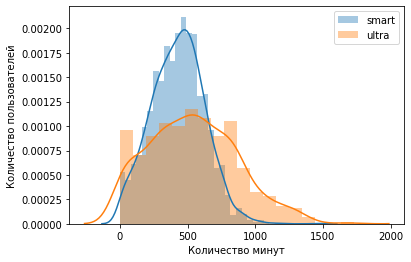

In [25]:
# построим гистограму количества минут
sns.distplot(smart_df['duration'], label='smart')
sns.distplot(ultra_df['duration'], label='ultra')
plt.legend(loc='upper right')
plt.xlabel('Количество минут')
plt.ylabel('Количество пользователей')
plt.show()


Распределения стремятся к нормальному

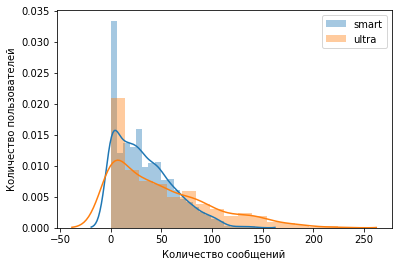

In [26]:
# построим гистограму количества сообщений
sns.distplot(smart_df['count_messages'], label='smart')
sns.distplot(ultra_df['count_messages'], label='ultra')
plt.legend(loc='upper right')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество пользователей')
plt.show()

Видим Паусоновское распределение со смещением в право

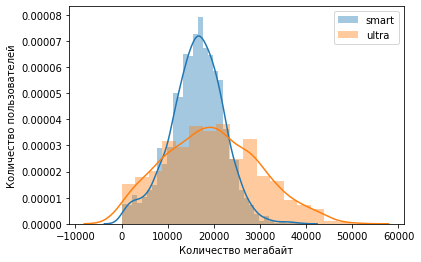

In [27]:
# построим гистограму количества использованных мегабайт
sns.distplot(smart_df['mb_used'], label='smart')
sns.distplot(ultra_df['mb_used'], label='ultra')
plt.legend(loc='upper right')
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество пользователей')
plt.show()

Видим распределения стремящиеся к нормальному

## Вывод 

Пользователи тарифа "ультра" более активны и разнообразны в пользовании услугами чем пользователи "смарта"(видно по дисперсии), пользователи смарта больше тратят на внетарифные минуты/мегабайты/сообщения, данные в таблице распределенны нормально

 # Шаг 4 Гипотезы
 ### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
 
 
 Нулевая гипотеза H₀:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт»  НЕ различается
 
 Альтернативная гипотеза H₁:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
 

In [28]:
results = st.ttest_ind(smart_df['revenue'], ultra_df['revenue'])

alpha = 0.01 # установим уровень доставерности 99%
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 8.009674149481265e-180
Отвергаем нулевую гипотезу


#### Вывод 
С доставерностью в 99% средняя выручка тарифов различается, вероятность того что выручка окажется одинаковой равна 8 * 10⁻¹⁸⁰

 ### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
 
 
 Нулевая гипотеза H₀:
 - средняя выручка пользователей из Москвы  НЕ отличается от выручки пользователей из других регионов
 
 Альтернативная гипотеза H₁:
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [29]:
results = st.ttest_ind(df.query('city == "Москва"')['revenue'], df.query('city != "Москва"')['revenue'])

alpha = 0.01
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5220687323801865
Не получилось отвергнуть нулевую гипотезу


#### Вывод 
Шанс того, что выручка будет одинакова равно 52%, очень высокий процент, следовательно Москва от регионов по выручке не отличается с доставерностью 99%   

# Шаг 5 Общий вывод

1. Данные в целом собраны качественно, отсутствую пропуски, нет дублированной информации. В итоге, некоторые данные привели к более удобному типу, минуты и мегобайты округлили в большую сторону, нулевым значениям присвоили "1", данных с нулевой интернет ссесией и нулевым количеством минут было 13% и 19% соответственно.
2. Все данные свели в одну таблицу, посчитали и добавили в общую таблицу выручку для дальнейшего анализа
3. После анализа выяснилось что, пользователи тарифа "ультра" более активны и разнообразны в пользовании услугами чем пользователи "смарта"(видно по дисперсии), пользователи смарта больше тратят на внетарифные минуты/мегабайты/сообщения
4. Выдвинули две гипотезы:
   - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
   - Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

    В итоге: с доставерностью в 99% средняя выручка тарифов различается, вероятность того что выручка окажется одинаковой равна 8 * 10⁻¹⁸⁰;
    
    Шанс того, что выручка будет одинакова равно 52%, очень высокий процент, следовательно Москва от регионов по выручке не отличается с доставерностью 99%
    
Рекомендации для заказчика: повысить рекламный бюджет для тарифа "Ультра"